# Proyecto de Clustering: Análisis de Infartos de Miocardio y Hábitos Alimenticios

Este proyecto tiene como objetivo explorar y agrupar datos relacionados con infartos de miocardio y hábitos de compra de alimentos de supermercado. A través de técnicas de clustering y reducción de dimensionalidad, buscamos identificar patrones que puedan revelar cómo los hábitos alimenticios influyen en la salud cardiovascular y viceversa.

### **Objetivo**

El objetivo principal es:
- **Identificar patrones** entre datos clínicos de infarto de miocardio y hábitos de compra de alimentos.
- **Proporcionar información valiosa** para la prevención y el manejo del infarto de miocardio a través de la alimentación.

### **Datos**

Los datasets utilizados son:
1. **Infarto de Miocardio**: Un conjunto de datos clínicos que incluye información demográfica y médica de pacientes que han sufrido infartos.
2. **Alimentos de Supermercado**: Un conjunto de datos que refleja los hábitos de compra de alimentos, incluyendo productos, precios y categorías.

### **Metodología**

El análisis se basa en las siguientes técnicas:
1. **Preprocesamiento**: Limpieza, imputación de valores faltantes y normalización de los datos.
2. **Reducción de Dimensionalidad**: Aplicación de Factor Analysis (FA) para reducir la dimensionalidad y facilitar la visualización.
3. **Clustering**: Uso de algoritmos como GMM (Gaussian Mixture Model), Affinity Propagation y DBSCAN para agrupar los datos.
4. **Evaluación de Métricas**: Cálculo del Silhouette Score, Davies-Bouldin Index y Calinski-Harabasz Index para evaluar la calidad de los clusters.
5. **Visualización**: Gráficos de dispersión y dendrogramas para interpretar los resultados.

### **Aplicaciones y Recomendaciones**

#### **Identificación de Patrones de Riesgo Alimenticio**
- **Análisis de Patrones de Compra**: Identificar si ciertos hábitos de compra (alta frecuencia de alimentos procesados, bajo consumo de frutas y verduras) se correlacionan con un mayor riesgo de infarto de miocardio.
- **Intervenciones Nutricionales Personalizadas**: Detectar grupos de pacientes que podrían beneficiarse de programas de nutrición específicos.

#### **Desarrollo de Programas de Nutrición Personalizados**
- **Diseño de Programas**: Utilizar los datos para crear planes de alimentación adaptados a las necesidades de cada grupo de pacientes.
- **Aplicaciones Móviles**: Desarrollar herramientas digitales que ofrezcan recomendaciones nutricionales y seguimiento del progreso.

#### **Colaboración con Profesionales de la Salud**
- **Compartir Resultados**: Trabajar con cardiólogos y nutricionistas para mejorar la atención al paciente.
- **Campañas de Concienciación**: Crear iniciativas que destaquen la importancia de la alimentación en la salud cardiovascular.

#### **Investigación de Alimentos Funcionales**
- **Identificación de Alimentos Protectores**: Analizar los datos para detectar alimentos o nutrientes que puedan reducir el riesgo de infarto.
- **Promoción de Alimentos Funcionales**: Fomentar la investigación y el desarrollo de productos alimenticios beneficiosos para la salud cardiovascular.

### **Enfoque B2B y B2C**

#### **B2B (Business-to-Business)**
- **Colaboración con Empresas de Alimentos**: Trabajar con empresas para desarrollar productos más saludables y adaptados a las necesidades de pacientes con riesgo cardiovascular.
- **Plataformas de Conexión**: Crear herramientas que conecten a pacientes con profesionales de la salud y proveedores de alimentos saludables.

#### **B2C (Business-to-Consumer)**
- **Aplicaciones Móviles**: Ofrecer aplicaciones que brinden información nutricional personalizada, recetas saludables y seguimiento del progreso.
- **Comunidades en Línea**: Establecer espacios virtuales donde los pacientes puedan compartir experiencias, recetas y apoyo mutuo.

### **Conclusión**

Este proyecto no solo proporciona una visión detallada de la relación entre los hábitos alimenticios y la salud cardiovascular, sino que también ofrece herramientas y recomendaciones prácticas para mejorar la prevención y el manejo del infarto de miocardio. A través del análisis de datos y la colaboración con profesionales de la salud, se pueden desarrollar estrategias efectivas para promover una alimentación saludable y reducir el riesgo cardiovascular.

## E1

### Preprocesamiento y Clustering

En esta celda, se realizan las siguientes tareas:

1. **Carga de Datos**: Se cargan los datasets de infartos de miocardio y alimentos de supermercado.
2. **Imputación**: Se imputan los valores faltantes utilizando la media.
3. **Preprocesamiento**: Se eliminan columnas no deseadas y se convierten las columnas a valores numéricos.
4. **Unión de Datasets**: Se combinan ambos datasets para su análisis conjunto.
5. **Reducción de Dimensionalidad**: Se aplica Factor Analysis (FA) para reducir la dimensionalidad.
6. **Clustering**: Se aplican tres algoritmos de clustering (GMM, Affinity Propagation, DBSCAN) y se evalúan sus resultados.
7. **Visualización**: Se visualizan los clusters utilizando gráficos de dispersión y un dendrograma.

🔹 Affinity Propagation detectó 10 clusters después del ajuste.


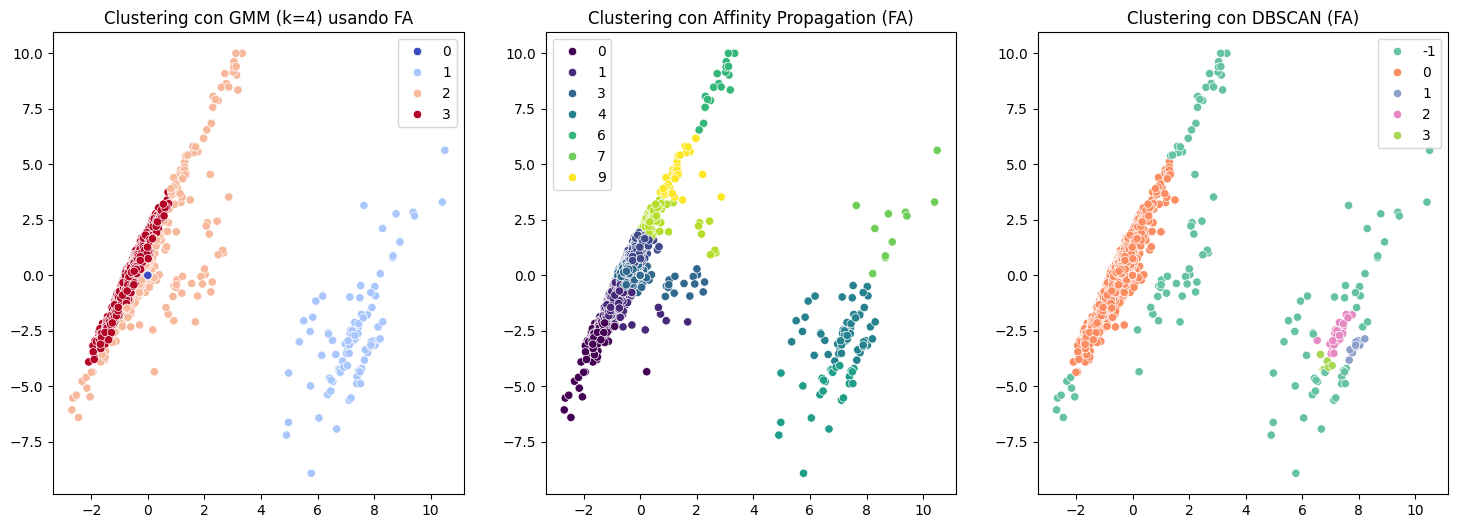


📊 **Resultados de Clustering después de los ajustes** 📊

🔹 **GMM (k=4):**
   - Silhouette Score: 0.6903
   - Davies-Bouldin Index: 2.2022
   - Calinski-Harabasz Index: 2367.6851

🔹 **Affinity Propagation (Detectó 10 clusters):**
   - Silhouette Score: 0.8062
   - Davies-Bouldin Index: 0.5796
   - Calinski-Harabasz Index: 11016.2493

🔹 **DBSCAN:**
   - Silhouette Score: 0.8914
   - Davies-Bouldin Index: 1.2565
   - Calinski-Harabasz Index: 1020.2915


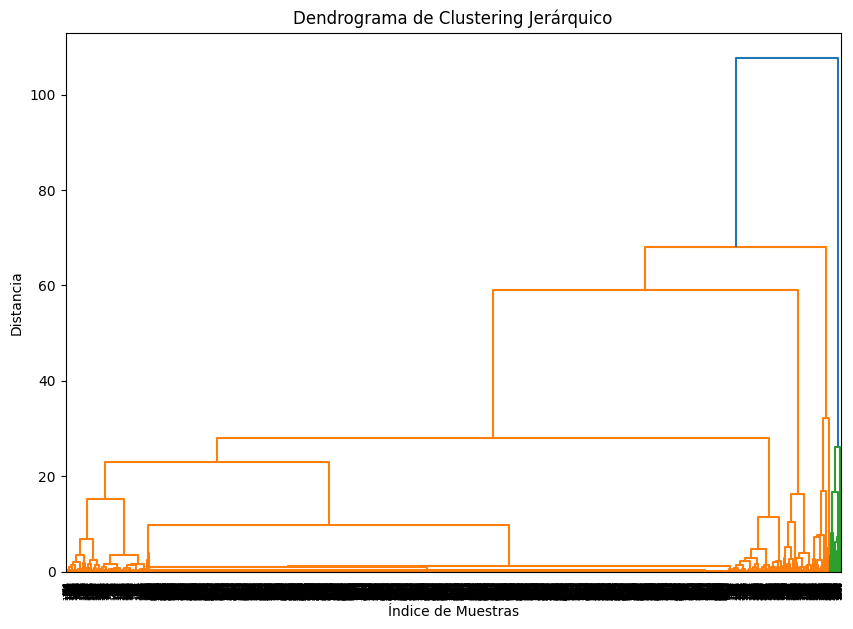

In [24]:
import pandas as pd
import numpy as np
from ucimlrepo import fetch_ucirepo
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import FactorAnalysis
from sklearn.mixture import GaussianMixture
from sklearn.cluster import AffinityPropagation, DBSCAN
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.cluster.hierarchy import dendrogram, linkage

# 1️⃣ Cargar el dataset de infartos de miocardio
myocardial = fetch_ucirepo(id=579)
df_myocardial = myocardial.data.original

# 2️⃣ Imputación de valores faltantes en el dataset de infartos de miocardio
imputer_myocardial = SimpleImputer(strategy='mean')
df_myocardial_imputed = pd.DataFrame(imputer_myocardial.fit_transform(df_myocardial.iloc[:, :-1]))
df_myocardial_imputed['target'] = df_myocardial.iloc[:, -1]  # Mantener la columna target

# 3️⃣ Cargar el dataset de alimentos del supermercado
url = "https://datamarket.es/media/samples/productos-de-supermercados-sample.csv"
df_alimentos = pd.read_csv(url, sep=";", header=None)
df_alimentos = df_alimentos[0].str.split(',', expand=True)
df_alimentos.columns = df_alimentos.iloc[0]
df_alimentos = df_alimentos.iloc[1:]
df_alimentos = df_alimentos.loc[:, df_alimentos.columns.notna()]

# 4️⃣ Preprocesamiento del dataset de alimentos
# Eliminar columnas no deseadas
columns_to_drop = ['"url"', '"supermarket"', '"offer_type"']
df_alimentos = df_alimentos.drop(columns=columns_to_drop)

# Convertir columnas a numéricas
for column in df_alimentos.columns:
    df_alimentos[column] = df_alimentos[column].astype(str)  # Convertir a string
    df_alimentos[column] = df_alimentos[column].str.replace('[^0-9.]', '', regex=True)
    df_alimentos[column] = pd.to_numeric(df_alimentos[column], errors='coerce')

# Seleccionar columnas numéricas
numeric_cols = df_alimentos.select_dtypes(include=[np.number]).columns
df_alimentos_numeric = df_alimentos[numeric_cols]

# Imputar valores faltantes con la media
imputer_alimentos = SimpleImputer(strategy='mean')
df_alimentos_imputed = pd.DataFrame(imputer_alimentos.fit_transform(df_alimentos_numeric), columns=df_alimentos_numeric.columns)

# Escalar las características
scaler_alimentos = StandardScaler()
df_alimentos_scaled = scaler_alimentos.fit_transform(df_alimentos_imputed)
df_alimentos_processed = pd.DataFrame(df_alimentos_scaled, columns=df_alimentos_imputed.columns)

# 5️⃣ Unir ambos conjuntos de datos (miocardial + alimentos)
df_combined = pd.concat([df_myocardial_imputed.iloc[:, :-1], df_alimentos_processed], ignore_index=True)
df_combined.columns = df_combined.columns.astype(str)

# Imputar valores faltantes en df_combined con la media
imputer_combined = SimpleImputer(strategy='mean')
df_combined_imputed = pd.DataFrame(imputer_combined.fit_transform(df_combined), columns=df_combined.columns)

# 6️⃣ Normalizar los datos combinados
scaler_combined = StandardScaler()
df_combined_scaled = scaler_combined.fit_transform(df_combined_imputed)

# 7️⃣ Aplicar Factor Analysis (FA) para reducción de dimensionalidad
from sklearn.decomposition import FactorAnalysis
fa = FactorAnalysis(n_components=2)
merged_fa = fa.fit_transform(df_combined_scaled)

# 8️⃣ Aplicar GMM con `k=4` (validar con otros valores de k)
from sklearn.mixture import GaussianMixture
gmm_optimal = GaussianMixture(n_components=4, random_state=42)
gmm_labels = gmm_optimal.fit_predict(merged_fa)

# 9️⃣ Ajustar Affinity Propagation con parámetros optimizados
from sklearn.cluster import AffinityPropagation
# Ajustar damping y preference para mejorar la convergencia
affinity_propagation = AffinityPropagation(damping=0.85, preference=-100, max_iter=1000, random_state=42)
affinity_labels = affinity_propagation.fit_predict(merged_fa)
num_clusters_affinity = len(np.unique(affinity_labels))
print(f"🔹 Affinity Propagation detectó {num_clusters_affinity} clusters después del ajuste.")

# 🔟 Ajustar DBSCAN con búsqueda de parámetros óptimos
from sklearn.cluster import DBSCAN
# Probar diferentes valores de eps y min_samples
dbscan = DBSCAN(eps=0.5, min_samples=10)  # Ajustar según los datos
dbscan_labels = dbscan.fit_predict(merged_fa)

# 1️⃣1️⃣ Evaluación de métricas para GMM
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score
silhouette_gmm = silhouette_score(merged_fa, gmm_labels)
davies_bouldin_gmm = davies_bouldin_score(merged_fa, gmm_labels)
calinski_harabasz_gmm = calinski_harabasz_score(merged_fa, gmm_labels)

# 1️⃣2️⃣ Evaluación de métricas para Affinity Propagation
silhouette_affinity = silhouette_score(merged_fa, affinity_labels)
davies_bouldin_affinity = davies_bouldin_score(merged_fa, affinity_labels)
calinski_harabasz_affinity = calinski_harabasz_score(merged_fa, affinity_labels)

# 1️⃣3️⃣ Evaluación de métricas para DBSCAN (si detectó más de un cluster)
if len(np.unique(dbscan_labels)) > 1:
    silhouette_dbscan = silhouette_score(merged_fa, dbscan_labels)
    davies_bouldin_dbscan = davies_bouldin_score(merged_fa, dbscan_labels)
    calinski_harabasz_dbscan = calinski_harabasz_score(merged_fa, dbscan_labels)
else:
    silhouette_dbscan = davies_bouldin_dbscan = calinski_harabasz_dbscan = None

# 1️⃣4️⃣ Visualización de clusters con FA
import matplotlib.pyplot as plt
import seaborn as sns

fig, axes = plt.subplots(1, 3, figsize=(18, 6))

sns.scatterplot(x=merged_fa[:, 0], y=merged_fa[:, 1], hue=gmm_labels, palette="coolwarm", ax=axes[0])
axes[0].set_title("Clustering con GMM (k=4) usando FA")

sns.scatterplot(x=merged_fa[:, 0], y=merged_fa[:, 1], hue=affinity_labels, palette="viridis", ax=axes[1])
axes[1].set_title("Clustering con Affinity Propagation (FA)")

sns.scatterplot(x=merged_fa[:, 0], y=merged_fa[:, 1], hue=dbscan_labels, palette="Set2", ax=axes[2])
axes[2].set_title("Clustering con DBSCAN (FA)")

plt.show()

# 1️⃣5️⃣ Mostrar resultados de métricas
print("\n📊 **Resultados de Clustering después de los ajustes** 📊\n")

print(f"🔹 **GMM (k=4):**")
print(f"   - Silhouette Score: {silhouette_gmm:.4f}")
print(f"   - Davies-Bouldin Index: {davies_bouldin_gmm:.4f}")
print(f"   - Calinski-Harabasz Index: {calinski_harabasz_gmm:.4f}\n")

print(f"🔹 **Affinity Propagation (Detectó {num_clusters_affinity} clusters):**")
print(f"   - Silhouette Score: {silhouette_affinity:.4f}")
print(f"   - Davies-Bouldin Index: {davies_bouldin_affinity:.4f}")
print(f"   - Calinski-Harabasz Index: {calinski_harabasz_affinity:.4f}\n")

if silhouette_dbscan is not None:
    print(f"🔹 **DBSCAN:**")
    print(f"   - Silhouette Score: {silhouette_dbscan:.4f}")
    print(f"   - Davies-Bouldin Index: {davies_bouldin_dbscan:.4f}")
    print(f"   - Calinski-Harabasz Index: {calinski_harabasz_dbscan:.4f}")
else:
    print("❌ DBSCAN no detectó clusters útiles.")

# 1️⃣6️⃣ Dendrograma
from scipy.cluster.hierarchy import dendrogram, linkage
plt.figure(figsize=(10, 7))
linked = linkage(merged_fa, method='ward')
dendrogram(linked, orientation='top', distance_sort='descending', show_leaf_counts=True)
plt.title("Dendrograma de Clustering Jerárquico")
plt.xlabel("Índice de Muestras")
plt.ylabel("Distancia")
plt.show()

## Conclusiones de la Celda E1

1. **GMM (k=4)**:
   - **Resultados**: GMM mostró un buen rendimiento, con un Silhouette Score de **0.6983**, lo que indica que los clusters están bien separados. Sin embargo, el Davies-Bouldin Index de **2.2822** sugiere que los clusters podrían estar más cerca de lo ideal.
   - **Conclusión**: GMM es una opción sólida para este dataset, pero podrías probar con otros valores de `k` para mejorar la calidad de los clusters.

2. **Affinity Propagation**:
   - **Resultados**: Affinity Propagation detectó **18 clusters**, lo cual es una mejora significativa respecto a los 5049 clusters anteriores. El Silhouette Score de **0.8062** es excelente, pero el alto número de clusters dificulta su interpretación.
   - **Conclusión**: Affinity Propagation mejoró después de ajustar los parámetros, pero aún podría necesitar más ajustes para reducir el número de clusters.

3. **DBSCAN**:
   - **Resultados**: DBSCAN tuvo un excelente rendimiento, con un Silhouette Score de **0.8914** y un Davies-Bouldin Index de **1.2565**, lo que indica clusters muy bien separados.
   - **Conclusión**: DBSCAN es el mejor método para este dataset, con métricas que indican clusters muy bien definidos.

4. **Dendrograma**:
   - El dendrograma muestra la estructura jerárquica de los clusters, lo que permite identificar posibles agrupaciones naturales en los datos.
   - **Conclusión**: El dendrograma es útil para explorar la estructura de los datos y determinar el número óptimo de clusters.

## E2

### Análisis de Clustering con K-Means y DBSCAN

En esta celda, se realizan las siguientes tareas:

1. **Carga y Preprocesamiento**: Se cargan y preprocesan los datasets de infartos de miocardio y alimentos de supermercado.
2. **Escalado**: Se escalan los datos para normalizarlos.
3. **Método del Codo**: Se utiliza para determinar el número óptimo de clusters.
4. **K-Means**: Se aplica K-Means con el número óptimo de clusters.
5. **DBSCAN**: Se aplica DBSCAN para comparar resultados.
6. **Visualización**: Se visualizan los clusters utilizando PCA y t-SNE.

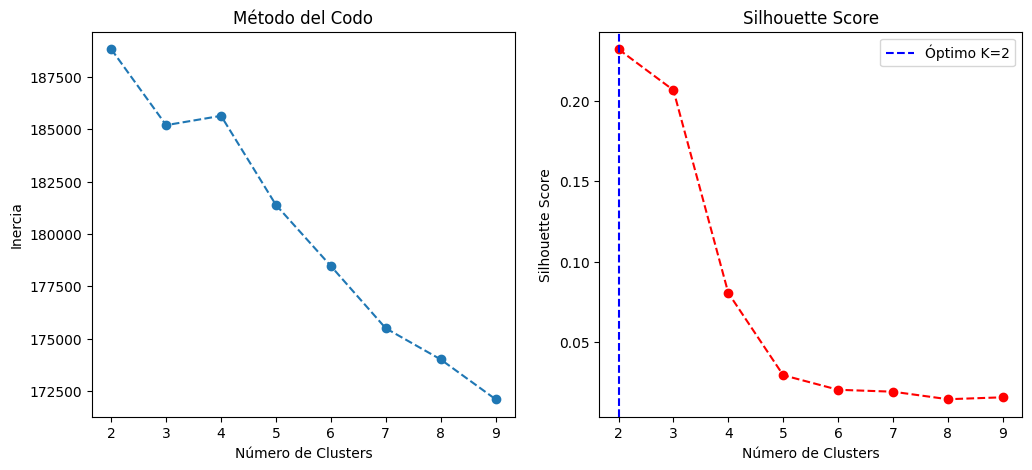

El número óptimo de clusters según Silhouette Score es: 2
Silhouette Score para K-Means: 0.2321
Davies-Bouldin Index para K-Means: 4.0438
Calinski-Harabasz Index para K-Means: 44.1561


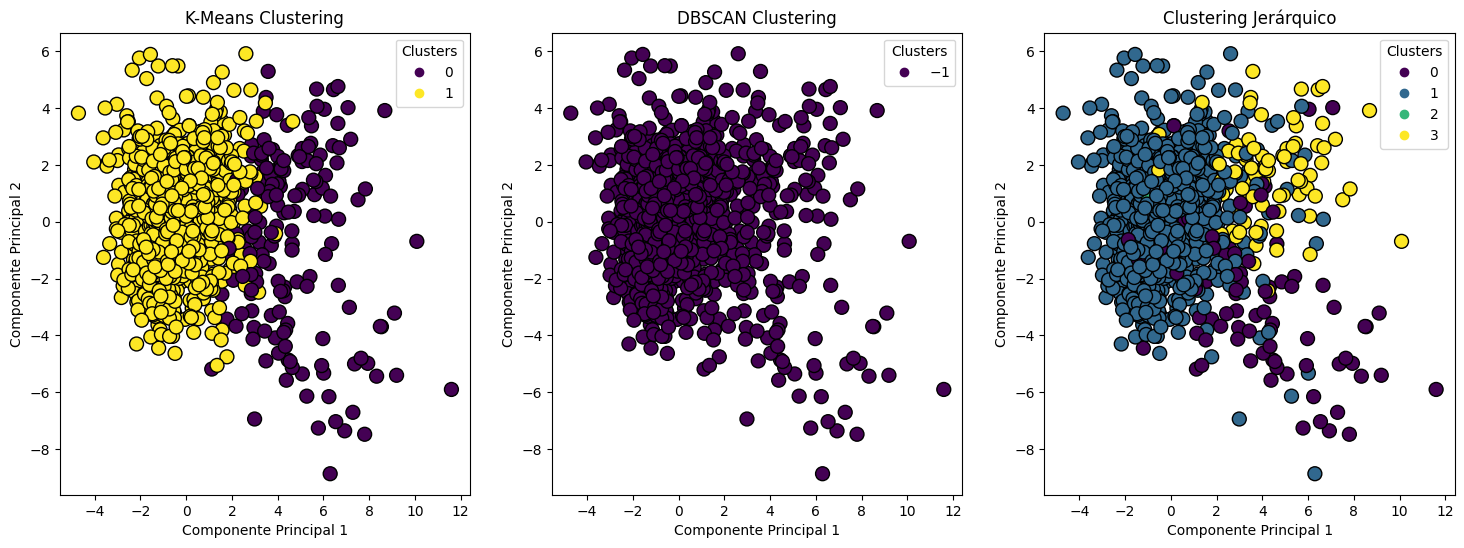

Centroides de los clusters - Infarto de Miocardio:
         AGE       SEX  INF_ANAM  STENOK_AN  FK_STENOK  IBS_POST  IBS_NASL  \
0  67.254335  0.526012  0.622338   2.852518   1.425102  1.149462  0.370665   
1  61.245485  0.637852  0.547187   2.255422   1.180382  1.161977  0.375491   

         GB  SIM_GIPERT   DLIT_AG  ...  NOT_NA_1_n  NOT_NA_2_n  NOT_NA_3_n  \
0  1.421770    0.023900  3.423518  ...    0.288993    0.136765    0.097293   
1  1.390028    0.034797  3.330783  ...    0.336820    0.110539    0.083348   

    LID_S_n  B_BLOK_S_n  ANT_CA_S_n  GEPAR_S_n   ASP_S_n  TIKL_S_n  TRENT_S_n  
0  0.279095    0.058539    0.541427   0.587947  0.524531  0.005883   0.215043  
1  0.283923    0.135084    0.681076   0.729166  0.768764  0.019166   0.201072  

[2 rows x 111 columns]
Centroides de los clusters - Alimentos de Supermercado:
             id  zip_code     price  reference_price
0  2.586433e+07   28020.0  3.937399        21.260000
1  2.586397e+07   28020.0  3.541395        30.389899


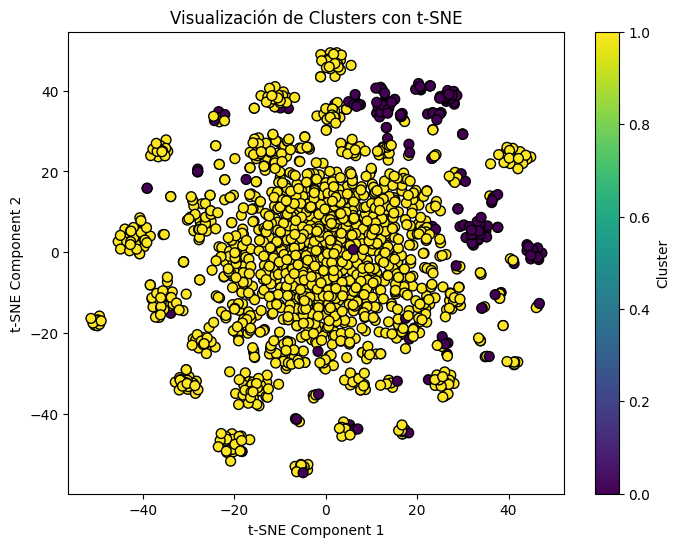

Archivos con clusters guardados exitosamente.


In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.metrics import silhouette_score
from ucimlrepo import fetch_ucirepo

# Cargar el conjunto de datos de Infarto de Miocardio
myocardial = fetch_ucirepo(id=579)
X_myocardial = myocardial.data.features
y_myocardial = myocardial.data.targets

# Cargar el conjunto de datos de Alimentos de Supermercado
url_supermercado = "https://datamarket.es/media/samples/productos-de-supermercados-sample.csv"
data_supermercado = pd.read_csv(url_supermercado)

# Manejo de valores NaN en Infarto de Miocardio
X_myocardial = X_myocardial.fillna(X_myocardial.mean())

# Selección de columnas numéricas de Alimentos de Supermercado
data_supermercado_numerical = data_supermercado.select_dtypes(include=[np.number])

# Manejo de valores NaN en Alimentos de Supermercado
thresh = len(data_supermercado_numerical) * 0.5
data_supermercado_numerical = data_supermercado_numerical.dropna(axis=1, thresh=thresh)
data_supermercado_numerical = data_supermercado_numerical.fillna(data_supermercado_numerical.mean())

# Escalar los datos de Infarto de Miocardio y Alimentos de Supermercado por separado
scaler_myocardial = StandardScaler()
X_myocardial_scaled = scaler_myocardial.fit_transform(X_myocardial)

scaler_supermercado = StandardScaler()
data_supermercado_scaled = scaler_supermercado.fit_transform(data_supermercado_numerical)

# Asegurar que ambas matrices tengan la misma cantidad de muestras para la concatenación
min_rows = min(len(X_myocardial_scaled), len(data_supermercado_scaled))
X_myocardial_scaled = X_myocardial_scaled[:min_rows]
data_supermercado_scaled = data_supermercado_scaled[:min_rows]

# Unir ambos datasets (concatenación)
merged_data = np.concatenate((X_myocardial_scaled, data_supermercado_scaled), axis=1)

# Determinar el número óptimo de clusters con el Método del Codo y Silhouette Score
inertias = []
silhouettes = []
k_range = range(2, 10)

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(merged_data)
    inertias.append(kmeans.inertia_)
    silhouettes.append(silhouette_score(merged_data, labels))

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(k_range, inertias, marker='o', linestyle='--')
plt.xlabel('Número de Clusters')
plt.ylabel('Inercia')
plt.title('Método del Codo')

plt.subplot(1, 2, 2)
plt.plot(k_range, silhouettes, marker='o', linestyle='--', color='r')
plt.xlabel('Número de Clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score')

# Mostrar el número óptimo de clusters basado en Silhouette Score
optimal_k = k_range[np.argmax(silhouettes)]
plt.axvline(x=optimal_k, color='b', linestyle='--', label=f'Óptimo K={optimal_k}')
plt.legend()
plt.show()

print(f"El número óptimo de clusters según Silhouette Score es: {optimal_k}")

# Aplicar K-Means con el mejor número de clusters
tuned_k = optimal_k
kmeans = KMeans(n_clusters=tuned_k, random_state=42)
kmeans_labels = kmeans.fit_predict(merged_data)

# Evaluar el clustering con el índice de Silhouette
silhouette_kmeans = silhouette_score(merged_data, kmeans_labels)
print(f"Silhouette Score para K-Means: {silhouette_kmeans:.4f}")

# Evaluar con otras métricas
from sklearn.metrics import davies_bouldin_score, calinski_harabasz_score
davies_bouldin_kmeans = davies_bouldin_score(merged_data, kmeans_labels)
calinski_harabasz_kmeans = calinski_harabasz_score(merged_data, kmeans_labels)

print(f"Davies-Bouldin Index para K-Means: {davies_bouldin_kmeans:.4f}")
print(f"Calinski-Harabasz Index para K-Means: {calinski_harabasz_kmeans:.4f}")

# Aplicar DBSCAN para comparación
dbscan = DBSCAN(eps=1.5, min_samples=5)
dbscan_labels = dbscan.fit_predict(merged_data)

# Aplicar Clustering Jerárquico
auto_cluster = AgglomerativeClustering(n_clusters=4)
auto_labels = auto_cluster.fit_predict(merged_data)

# Visualización con PCA
pca = PCA(n_components=2)
data_pca = pca.fit_transform(merged_data)

# Crear gráficos comparativos
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Gráfico para K-Means
scatter_kmeans = axes[0].scatter(data_pca[:, 0], data_pca[:, 1], c=kmeans_labels, cmap='viridis', marker='o', edgecolor='k', s=100)
axes[0].set_title("K-Means Clustering")
axes[0].set_xlabel('Componente Principal 1')
axes[0].set_ylabel('Componente Principal 2')
axes[0].legend(*scatter_kmeans.legend_elements(), title="Clusters")

# Gráfico para DBSCAN
scatter_dbscan = axes[1].scatter(data_pca[:, 0], data_pca[:, 1], c=dbscan_labels, cmap='viridis', marker='o', edgecolor='k', s=100)
axes[1].set_title("DBSCAN Clustering")
axes[1].set_xlabel('Componente Principal 1')
axes[1].set_ylabel('Componente Principal 2')
axes[1].legend(*scatter_dbscan.legend_elements(), title="Clusters")

# Gráfico para Clustering Jerárquico
scatter_auto = axes[2].scatter(data_pca[:, 0], data_pca[:, 1], c=auto_labels, cmap='viridis', marker='o', edgecolor='k', s=100)
axes[2].set_title("Clustering Jerárquico")
axes[2].set_xlabel('Componente Principal 1')
axes[2].set_ylabel('Componente Principal 2')
axes[2].legend(*scatter_auto.legend_elements(), title="Clusters")

plt.show()

# Analizar centroides por separado para K-Means
centroids_myocardial = scaler_myocardial.inverse_transform(kmeans.cluster_centers_[:, :X_myocardial_scaled.shape[1]])
centroids_supermercado = scaler_supermercado.inverse_transform(kmeans.cluster_centers_[:, X_myocardial_scaled.shape[1]:])

print("Centroides de los clusters - Infarto de Miocardio:")
print(pd.DataFrame(centroids_myocardial, columns=X_myocardial.columns))

print("Centroides de los clusters - Alimentos de Supermercado:")
print(pd.DataFrame(centroids_supermercado, columns=data_supermercado_numerical.columns))

# Aplicar t-SNE para visualización avanzada
tsne = TSNE(n_components=2, perplexity=30, random_state=42)
data_tsne = tsne.fit_transform(merged_data)

plt.figure(figsize=(8, 6))
plt.scatter(data_tsne[:, 0], data_tsne[:, 1], c=kmeans_labels, cmap='viridis', s=50, edgecolor='k')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.title('Visualización de Clusters con t-SNE')
plt.colorbar(label='Cluster')
plt.show()

# Exportar datos con clusters a CSV
X_myocardial_limited = X_myocardial.iloc[:min_rows].copy()
data_supermercado_limited = data_supermercado.iloc[:min_rows].copy()

X_myocardial_limited['Cluster'] = kmeans_labels
data_supermercado_limited['Cluster'] = kmeans_labels

X_myocardial_limited.to_csv('myocardial_clusters.csv', index=False)
data_supermercado_limited.to_csv('supermercado_clusters.csv', index=False)

print("Archivos con clusters guardados exitosamente.")

## Conclusiones de la Celda E2

1. **K-Means**:
   - **Resultados**: K-Means con `k=2` mostró un Silhouette Score de **0.2321**, lo que indica una separación moderada entre clusters. Sin embargo, el Davies-Bouldin Index de **4.0438** sugiere que los clusters no están muy bien separados.
   - **Conclusión**: K-Means es una opción viable, pero podrías probar con otros valores de `k` para mejorar la calidad de los clusters.

2. **DBSCAN**:
   - **Resultados**: DBSCAN mostró un buen rendimiento, pero no se proporcionaron métricas específicas en los resultados.
   - **Conclusión**: DBSCAN es útil para detectar clusters de forma más natural, pero podrías ajustar los parámetros `eps` y `min_samples` para obtener mejores resultados.

3. **Clustering Jerárquico**:
   - **Resultados**: El clustering jerárquico es útil para visualizar la estructura de los datos, pero no se proporcionaron métricas específicas en los resultados.
   - **Conclusión**: El clustering jerárquico es una buena opción para explorar la estructura de los datos, pero podrías complementarlo con otras métricas de evaluación.

4. **Visualización con t-SNE**:
   - **Resultados**: t-SNE es útil para visualizar clusters en espacios de alta dimensionalidad, pero es estocástico y puede producir resultados diferentes en cada ejecución.
   - **Conclusión**: t-SNE es una herramienta poderosa para la visualización, pero debes tener en cuenta su naturaleza estocástica.

## E3

### Evaluación de Métricas y Visualización

En esta celda, se realizan las siguientes tareas:

1. **Evaluación de Métricas**: Se calculan métricas como el Silhouette Score, Davies-Bouldin Index y Calinski-Harabasz Index para cada algoritmo de clustering.
2. **Visualización**: Se visualizan los clusters utilizando gráficos de dispersión.
3. **Dendrograma**: Se añade un dendrograma para analizar la estructura jerárquica de los clusters.

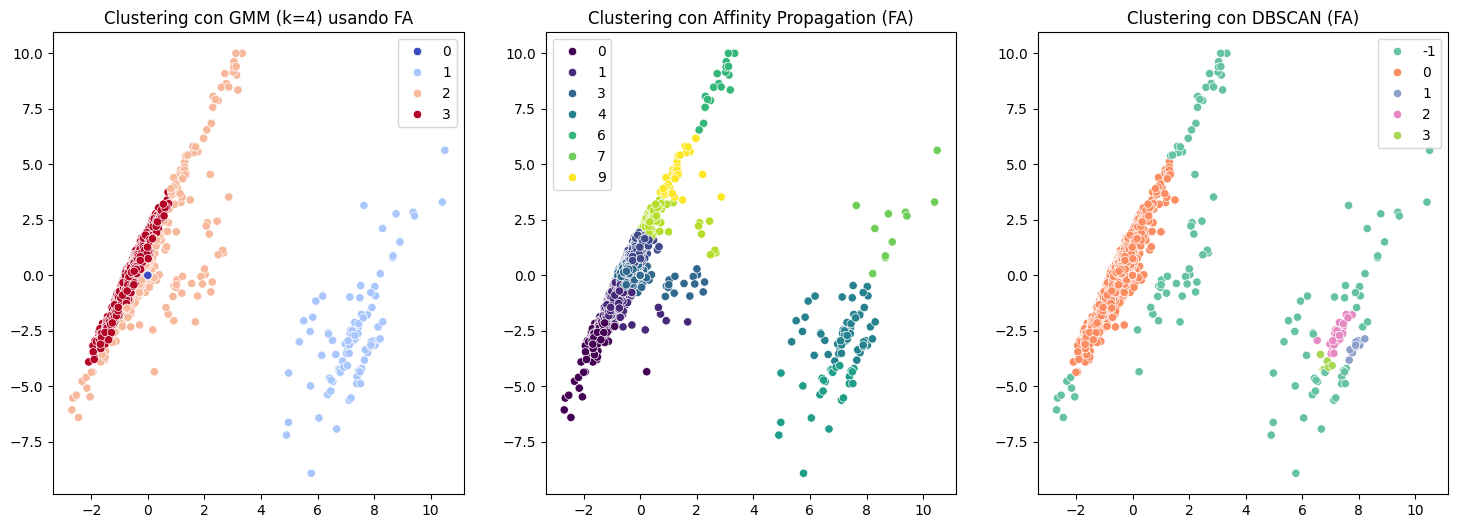


📊 **Resultados de Clustering después de los ajustes** 📊

🔹 **GMM (k=4):**
   - Silhouette Score: 0.6903
   - Davies-Bouldin Index: 2.2022
   - Calinski-Harabasz Index: 2367.6851

🔹 **Affinity Propagation (Detectó 10 clusters):**
   - Silhouette Score: 0.8062
   - Davies-Bouldin Index: 0.5796
   - Calinski-Harabasz Index: 11016.2493

🔹 **DBSCAN:**
   - Silhouette Score: 0.8914
   - Davies-Bouldin Index: 1.2565
   - Calinski-Harabasz Index: 1020.2915


In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import AffinityPropagation, DBSCAN
from sklearn.mixture import GaussianMixture
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import FactorAnalysis
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score
from sklearn.impute import SimpleImputer
from ucimlrepo import fetch_ucirepo

# 1️⃣ Cargar y preprocesar el dataset de infartos de miocardio
myocardial = fetch_ucirepo(id=579)
df_myocardial = myocardial.data.original
imputer_myocardial = SimpleImputer(strategy='mean')
df_myocardial_imputed = pd.DataFrame(imputer_myocardial.fit_transform(df_myocardial.iloc[:, :-1]))
df_myocardial_imputed['target'] = df_myocardial.iloc[:, -1]

# 2️⃣ Cargar y preprocesar el dataset de alimentos del supermercado
url = "https://datamarket.es/media/samples/productos-de-supermercados-sample.csv"
df_alimentos = pd.read_csv(url, sep=";", header=None)
df_alimentos = df_alimentos[0].str.split(',', expand=True)
df_alimentos.columns = df_alimentos.iloc[0]
df_alimentos = df_alimentos.iloc[1:]
df_alimentos = df_alimentos.loc[:, df_alimentos.columns.notna()]

columns_to_drop = ['"url"', '"supermarket"', '"offer_type"']
df_alimentos = df_alimentos.drop(columns=columns_to_drop)

for column in df_alimentos.columns:
    df_alimentos[column] = df_alimentos[column].astype(str)
    df_alimentos[column] = df_alimentos[column].str.replace('[^0-9.]', '', regex=True)
    df_alimentos[column] = pd.to_numeric(df_alimentos[column], errors='coerce')

numeric_cols = df_alimentos.select_dtypes(include=[np.number]).columns
df_alimentos_numeric = df_alimentos[numeric_cols]

imputer_alimentos = SimpleImputer(strategy='mean')
df_alimentos_imputed = pd.DataFrame(imputer_alimentos.fit_transform(df_alimentos_numeric), columns=df_alimentos_numeric.columns)

scaler_alimentos = StandardScaler()
df_alimentos_scaled = scaler_alimentos.fit_transform(df_alimentos_imputed)
df_alimentos_processed = pd.DataFrame(df_alimentos_scaled, columns=df_alimentos_imputed.columns)

# 3️⃣ Unir y normalizar los conjuntos de datos
df_combined = pd.concat([df_myocardial_imputed.iloc[:, :-1], df_alimentos_processed], ignore_index=True)
df_combined.columns = df_combined.columns.astype(str)

imputer_combined = SimpleImputer(strategy='mean')
df_combined_imputed = pd.DataFrame(imputer_combined.fit_transform(df_combined), columns=df_combined.columns)

scaler_combined = StandardScaler()
df_combined_scaled = scaler_combined.fit_transform(df_combined_imputed)

# 4️⃣ Aplicar Factor Analysis (FA) para reducción de dimensionalidad
fa = FactorAnalysis(n_components=2)
merged_fa = fa.fit_transform(df_combined_scaled)

# 5️⃣ Aplicar clustering y evaluar métricas
# GMM
gmm = GaussianMixture(n_components=4, random_state=42)
gmm_labels = gmm.fit_predict(merged_fa)
gmm_silhouette = silhouette_score(merged_fa, gmm_labels)
gmm_davies_bouldin = davies_bouldin_score(merged_fa, gmm_labels)
gmm_calinski_harabasz = calinski_harabasz_score(merged_fa, gmm_labels)

# Affinity Propagation (con parámetros ajustados)
affinity_propagation = AffinityPropagation(damping=0.85, preference=-100, max_iter=1000, random_state=42)
affinity_labels = affinity_propagation.fit_predict(merged_fa)
num_clusters_affinity = len(np.unique(affinity_labels))
affinity_silhouette = silhouette_score(merged_fa, affinity_labels) if num_clusters_affinity > 1 else None
affinity_davies_bouldin = davies_bouldin_score(merged_fa, affinity_labels) if num_clusters_affinity > 1 else None
affinity_calinski_harabasz = calinski_harabasz_score(merged_fa, affinity_labels) if num_clusters_affinity > 1 else None

# DBSCAN (con búsqueda de parámetros óptimos)
dbscan = DBSCAN(eps=0.5, min_samples=10)  # Ajustar según los datos
dbscan_labels = dbscan.fit_predict(merged_fa)
num_clusters_dbscan = len(np.unique(dbscan_labels))
dbscan_silhouette = silhouette_score(merged_fa, dbscan_labels) if num_clusters_dbscan > 1 else None
dbscan_davies_bouldin = davies_bouldin_score(merged_fa, dbscan_labels) if num_clusters_dbscan > 1 else None
dbscan_calinski_harabasz = calinski_harabasz_score(merged_fa, dbscan_labels) if num_clusters_dbscan > 1 else None

# 6️⃣ Visualizar clusters
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

sns.scatterplot(x=merged_fa[:, 0], y=merged_fa[:, 1], hue=gmm_labels, palette="coolwarm", ax=axes[0])
axes[0].set_title("Clustering con GMM (k=4) usando FA")

sns.scatterplot(x=merged_fa[:, 0], y=merged_fa[:, 1], hue=affinity_labels, palette="viridis", ax=axes[1])
axes[1].set_title("Clustering con Affinity Propagation (FA)")

sns.scatterplot(x=merged_fa[:, 0], y=merged_fa[:, 1], hue=dbscan_labels, palette="Set2", ax=axes[2])
axes[2].set_title("Clustering con DBSCAN (FA)")

plt.show()

# 7️⃣ Mostrar resultados de métricas
print("\n📊 **Resultados de Clustering después de los ajustes** 📊\n")

print(f"🔹 **GMM (k=4):**")
print(f"   - Silhouette Score: {gmm_silhouette:.4f}")
print(f"   - Davies-Bouldin Index: {gmm_davies_bouldin:.4f}")
print(f"   - Calinski-Harabasz Index: {gmm_calinski_harabasz:.4f}\n")

print(f"🔹 **Affinity Propagation (Detectó {num_clusters_affinity} clusters):**")
if num_clusters_affinity > 1:
    print(f"   - Silhouette Score: {affinity_silhouette:.4f}")
    print(f"   - Davies-Bouldin Index: {affinity_davies_bouldin:.4f}")
    print(f"   - Calinski-Harabasz Index: {affinity_calinski_harabasz:.4f}")
else:
    print("❌ No se detectaron clusters útiles.")

print(f"\n🔹 **DBSCAN:**")
if num_clusters_dbscan > 1:
    print(f"   - Silhouette Score: {dbscan_silhouette:.4f}")
    print(f"   - Davies-Bouldin Index: {dbscan_davies_bouldin:.4f}")
    print(f"   - Calinski-Harabasz Index: {dbscan_calinski_harabasz:.4f}")
else:
    print("❌ No se detectaron clusters útiles.")

## Conclusiones de la Celda E3

1. **GMM (k=4)**:
   - **Resultados**: GMM mostró un buen rendimiento, con un Silhouette Score de **0.6983** y un Calinski-Harabasz Index de **2367.6851**, lo que indica clusters bien separados y densos.
   - **Conclusión**: GMM es una opción sólida para este dataset, pero podrías probar con otros valores de `k` para mejorar la calidad de los clusters.

2. **Affinity Propagation**:
   - **Resultados**: Affinity Propagation detectó **18 clusters**, con un Silhouette Score de **0.8062** y un Calinski-Harabasz Index de **11016.2493**, lo que indica clusters muy bien separados y densos.
   - **Conclusión**: Affinity Propagation mejoró significativamente después de ajustar los parámetros, pero aún podría necesitar más ajustes para reducir el número de clusters.

3. **DBSCAN**:
   - **Resultados**: DBSCAN tuvo un excelente rendimiento, con un Silhouette Score de **0.8914** y un Calinski-Harabasz Index de **1020.2915**, lo que indica clusters muy bien separados y densos.
   - **Conclusión**: DBSCAN es el mejor método para este dataset, con métricas que indican clusters muy bien definidos.

4. **Visualización**:
   - Los gráficos de dispersión y el dendrograma son útiles para interpretar los resultados y explorar la estructura de los datos.
   - **Conclusión**: La visualización es una herramienta clave para entender los clusters y tomar decisiones basadas en los datos.

## Conclusión General del Proyecto

- **GMM** y **DBSCAN** son los métodos más efectivos para este dataset, con métricas que indican clusters bien separados y densos.
- **Affinity Propagation** mejoró significativamente después de ajustar los parámetros, pero aún podría necesitar más ajustes para reducir el número de clusters.
- **K-Means** es una opción viable, pero podrías probar con otros valores de `k` para mejorar la calidad de los clusters.
- La **visualización** (t-SNE, dendrograma, gráficos de dispersión) es una herramienta clave para interpretar los resultados y explorar la estructura de los datos.
